# Data

In [1]:
from dataclasses import dataclass 

@dataclass
class Node:
    name: str
    attributes: list[str]
    children: list

    def add_child(self, node):
        self.children.append(node)
    def add_attr(self, attr: str):
        self.attributes.append(attr)

    def __hash__(self):
        return hash(self.name)

In [2]:
root = Node("Root", [], [])

mesure_instance = root

mesure_to_influx = Node("InfluxData", [], [])
mesure_to_influx.add_attr("_time") 
mesure_to_influx.add_attr("instanceCode")
mesure_to_influx.add_attr("instanceType")
mesure_instance.add_child(mesure_to_influx)


mesure_machine = Node("Machine", [], [])
mesure_machine.add_attr("ramMax")
mesure_machine.add_attr("ramUsed")
mesure_machine.add_attr("ramUsedRatio")
mesure_machine.add_attr("swapMax")
mesure_machine.add_attr("swapUsed")
mesure_machine.add_attr("swapUsedRatio")
mesure_machine.add_attr("nbCpu")
mesure_machine.add_attr("procMax")
mesure_machine.add_attr("procUsed")
mesure_machine.add_attr("cpuLoad")
mesure_machine.add_attr("cpuLoadNorm")

mesure_to_influx.add_child(mesure_machine)

mesure_tomcat = Node("Tomcat", [], [])
mesure_tomcat.add_attr("maxFileDescriptorCount")
mesure_tomcat.add_attr("openFileDescriptorCount")
mesure_tomcat.add_attr("ratioOpenFileDescriptorCount")
mesure_tomcat.add_attr("nbOpenThreads")
mesure_tomcat.add_attr("ratioNbOpenThreads")
mesure_tomcat.add_attr("memHeapMax")
mesure_tomcat.add_attr("memHeapUsed")
mesure_tomcat.add_attr("MemHeapUsedRatio")
mesure_tomcat.add_attr("memNonHeapMax")
mesure_tomcat.add_attr("memNonHeapUsed")
mesure_tomcat.add_attr("memNonHeapUsedRatio")
mesure_to_influx.add_child(mesure_tomcat)

espace_stockage = Node("Storage", [], [])
espace_stockage.add_attr("storageName") 
espace_stockage.add_attr("mount")
espace_stockage.add_attr("right")
espace_stockage.add_attr("availableSpace")
espace_stockage.add_attr("maxSpace")
espace_stockage.add_attr("ratioAvailableSpace")
mesure_to_influx.add_child(espace_stockage)

gc = Node("GarbageCol", [], [])
gc.add_attr("nameGC")
gc.add_attr("callsNb")
gc.add_attr("durationGC")
mesure_to_influx.add_child(gc)

pda = Node("PDA", [], [])
pda.add_attr("pda") 
pda.add_attr("nbJVM")
mesure_to_influx.add_child(pda)

scheduler_quartz = Node("QuartzJobs", [], [])
scheduler_quartz.add_attr("paused")
scheduler_quartz.add_attr("shutdown")
scheduler_quartz.add_attr("started")
scheduler_quartz.add_attr("numJobsExecuted")
mesure_to_influx.add_child(scheduler_quartz)

In [3]:
top_processes = Node("TopProcesses", [], [])
top_processes.add_attr("top10")
top_processes.add_attr("rank")
top_processes.add_attr("user")
top_processes.add_attr("uid")
top_processes.add_attr("pid")
top_processes.add_attr("cmd")
top_processes.add_attr("ram") 
top_processes.add_attr("cpu") 
top_processes.add_attr("vsz")
top_processes.add_attr("rss")
top_processes.add_attr("swap")
mesure_to_influx.add_child(top_processes)

top_processes_type = {"TopProcCpu", "TopProcVMem", "TopProcRam", "TopProcSwap"}
for process_type in top_processes_type:
    top_processes.add_child(Node(process_type, [], [])) 

ping = Node("Ping", [], [])
ping.add_attr("pingDuration")
ping.add_attr("pingStatus")
ping.add_attr("responseName")
mesure_to_influx.add_child(ping)

instance_audit_stat = Node("AuditStat", [], [])
instance_audit_stat.add_attr("auditType") 
instance_audit_stat.add_attr("activeAudit") 
instance_audit_stat.add_attr("incrementalAudit") 
instance_audit_stat.add_attr("metadataId") 
instance_audit_stat.add_attr("auditRank") 
instance_audit_stat.add_attr("nbRows") 
mesure_to_influx.add_child(instance_audit_stat)

file_statistic = Node("FileStat", [], [])
file_statistic.add_attr("absolutePath")
file_statistic.add_attr("directory")
file_statistic.add_attr("collectTimeMS")
file_statistic.add_attr("sizeInBytes")
mesure_to_influx.add_child(file_statistic)



In [4]:
baseDonnee = Node("Database", [], [])
mesure_to_influx.add_child(baseDonnee)

mesure_BD = Node("DBMeasure", [], [])
mesure_BD.add_attr("activePool")
mesure_BD.add_attr("idlePool")
mesure_BD.add_attr("maxPool")
mesure_BD.add_attr("ratioActivePool")
baseDonnee.add_child(mesure_BD)

instance_table_bdd = Node("DBTablespace", [], [])
instance_table_bdd.add_attr("analysisObsoleteCount")
instance_table_bdd.add_attr("archiveLogsCount")
instance_table_bdd.add_attr("lastAnalysis")
instance_table_bdd.add_attr("userRecycleBinSize")
instance_table_bdd.add_attr("usedTablespaceSysaux")
instance_table_bdd.add_attr("tablespaceName")
instance_table_bdd.add_attr("defaultTablespace")
instance_table_bdd.add_attr("totalTablespace")
instance_table_bdd.add_attr("freeTablespace")
instance_table_bdd.add_attr("ratioFreeTablespace")
instance_table_bdd.add_attr("tableName")
instance_table_bdd.add_attr("tableSize")
instance_table_bdd.add_attr("indexSize")
instance_table_bdd.add_attr("lobSize")
instance_table_bdd.add_attr("sizeSum")
instance_table_bdd.add_attr("changedBlocks")
instance_table_bdd.add_attr("changedPercents")
instance_table_bdd.add_attr("nbRows") 
baseDonnee.add_child(instance_table_bdd)

bd_tablespace_sysaux = Node("DBSysOccupant", [], [])
bd_tablespace_sysaux.add_attr("occupantName")
bd_tablespace_sysaux.add_attr("occupantSize")
baseDonnee.add_child(bd_tablespace_sysaux)

bd_killed_sessions = Node("DBKilledSessions", [], [])
bd_killed_sessions.add_attr("sid")
bd_killed_sessions.add_attr("username")
bd_killed_sessions.add_attr("status")
bd_killed_sessions.add_attr("prevExecStartMS")
baseDonnee.add_child(bd_killed_sessions)

bd_archived_logs_per_object = Node("ArchivedLogsPerObj", [], [])
bd_archived_logs_per_object.add_attr("objectCode")
bd_archived_logs_per_object.add_attr("objectId")
bd_archived_logs_per_object.add_attr("owner")
bd_archived_logs_per_object.add_attr("type")
bd_archived_logs_per_object.add_attr("dbBlockChanges")
bd_archived_logs_per_object.add_attr("rank")
bd_archived_logs_per_object.add_attr("pct")
baseDonnee.add_child(bd_archived_logs_per_object)


In [5]:
copilote_compteur = Node("CopiloteCounter", [], [])
copilote_compteur.add_attr("counterCode")
copilote_compteur.add_attr("val")
copilote_compteur.add_attr("valMini")
copilote_compteur.add_attr("valMaxi")
copilote_compteur.add_attr("counterUsedRatio")
copilote_compteur.add_attr("typRAZ")
copilote_compteur.add_attr("period")
copilote_compteur.add_attr("startPeriodMS")
copilote_compteur.add_attr("endPeriodCycleMS")
mesure_to_influx.add_child(copilote_compteur)

mesure_copilote = Node("CopiloteMeasure", [], [])
mesure_copilote.add_attr("nbActivSess")
mesure_copilote.add_attr("nbActivSessOneMinute")
mesure_copilote.add_attr("nbDaemon")
mesure_copilote.add_attr("nbDaemonOneMinute")
mesure_to_influx.add_child(mesure_copilote)

In [7]:
mesure_to_elastic = Node("ElasticSearch", [], [])
mesure_to_elastic.add_attr("@timestamp") # En
mesure_to_elastic.add_attr("codeInstance")
mesure_to_elastic.add_attr("typeInstance")
mesure_instance.add_child(mesure_to_elastic)

menu_items = Node("MenuItemStat", [], [])
menu_items.add_attr("endingDate")
menu_items.add_attr("code")
menu_items.add_attr("label")
menu_items.add_attr("totalDuration")
menu_items.add_attr("focusDuration")
menu_items.add_attr("sessionId")
menu_items.add_attr("errorNb")
menu_items.add_attr("statType")
menu_items.add_attr("usr")
menu_items.add_attr("ikOrigin")
menu_items.add_attr("datCre")
menu_items.add_attr("ikFolder")
menu_items.add_attr("codeFolder")
menu_items.add_attr("labelFolder")
mesure_to_elastic.add_child(menu_items)

trace_audit = Node("TraceAudit", [], [])
trace_audit.add_attr("datCre")
trace_audit.add_attr("datMod")
trace_audit.add_attr("screen") 
trace_audit.add_attr("sessionId")
trace_audit.add_attr("trace")
trace_audit.add_attr("username")
trace_audit.add_attr("nbTrace")
trace_audit.add_attr("entry")
trace_audit.add_attr("component")
trace_audit.add_attr("ikOrigin")
trace_audit.add_attr("elementMetadata")
trace_audit.add_attr("elementEk")
trace_audit.add_attr("typTrace")
trace_audit.add_attr("lastDatTrace")
trace_audit.add_attr("folderCode")
trace_audit.add_attr("folderLabel")
mesure_to_elastic.add_child(trace_audit)


In [8]:
oracle_session_hist = Node("ActiveSessHist", [], [])
oracle_session_hist.add_attr("application") 
oracle_session_hist.add_attr("commit") 
oracle_session_hist.add_attr("concurrency") 
oracle_session_hist.add_attr("configuration") 
oracle_session_hist.add_attr("cpu") 
oracle_session_hist.add_attr("network") 
oracle_session_hist.add_attr("other") 
oracle_session_hist.add_attr("scheduler") 
oracle_session_hist.add_attr("systemIo") 
oracle_session_hist.add_attr("userIo") 
oracle_session_hist.add_attr("administrative") 
oracle_session_hist.add_attr("queueing") 

baseDonnee.add_child(oracle_session_hist)

In [9]:
mesure_heap = Node("CopiloteJmap", [], [])
mesure_to_influx.add_child(mesure_heap)

heap_dump_global = Node("JmapInfo", [], [])
mesure_heap.add_attr("parsingSucceeded")
mesure_heap.add_attr("totalNbObject")
mesure_heap.add_attr("totalSizeByte")
mesure_heap.add_attr("genDuration")
mesure_heap.add_attr("afterGC")
mesure_heap.add_attr("afterOOM")
mesure_heap.add_child(heap_dump_global)

heap_dump_detail = Node("ClassInfo", [], [])
heap_dump_detail.add_attr("className")
heap_dump_detail.add_attr("classRank")
heap_dump_detail.add_attr("nbObject")
heap_dump_detail.add_attr("sizeByte")
mesure_heap.add_child(heap_dump_detail)

In [10]:
mesure_lucene = Node("Lucene", [], [])
mesure_lucene.add_attr("indexName")
mesure_to_influx.add_child(mesure_lucene)

lucene_index_en_pause = Node("PausedIndex", [], [])
lucene_index_en_pause.add_attr("cause")
lucene_index_en_pause.add_attr("user") 
lucene_index_en_pause.add_attr("waitingTaskNb")
lucene_index_en_pause.add_attr("timestampPauseMS")
lucene_index_en_pause.add_attr("pauseDuration")
mesure_lucene.add_child(lucene_index_en_pause)

lucene_doc_en_attente = Node("WaitingDoc", [], [])
lucene_doc_en_attente.add_attr("metadataIdentifiable")
lucene_doc_en_attente.add_attr("nbWaitingDocument")
mesure_lucene.add_child(lucene_doc_en_attente)

lucene_job_en_cours = Node("CurrentJob", [], [])
lucene_job_en_cours.add_attr("nbDocInCurrentJob")
lucene_job_en_cours.add_attr("jobCreationTimeMS")
mesure_lucene.add_child(lucene_job_en_cours)

lucene_index_taille = Node("IndexSize", [], [])
lucene_index_taille.add_attr("sizeInByte")
mesure_lucene.add_child(lucene_index_taille)

In [11]:
infoserveur = Node("Infoserver", [], [])
infoserveur.add_attr("service")
infoserveur.add_attr("callDuration")
infoserveur.add_attr("sendingDuration")
infoserveur.add_attr("dumpLength")
infoserveur.add_attr("sessionOrBatchId")
infoserveur.add_attr("parseRequestDuration")
infoserveur.add_attr("initRequestDuration")
infoserveur.add_attr("serializeReturnDuration")
infoserveur.add_attr("sizeRequest")
infoserveur.add_attr("sizeResponse")
infoserveur.add_attr("cpuTime")
infoserveur.add_attr("allocatedBytes")
infoserveur.add_attr("userTime")
infoserveur.add_attr("user") 
mesure_to_elastic.add_child(infoserveur)

raw_sql_requests = Node("SqlRequest", [], [])
raw_sql_requests.add_attr("dump")
raw_sql_requests.add_attr("rowNumber")
raw_sql_requests.add_attr("request")
infoserveur.add_child(raw_sql_requests)

service_calls = Node("ServiceCalls", [], [])
service_calls.add_attr("description")
service_calls.add_attr("originInfo")
infoserveur.add_child(service_calls)


In [12]:
sessions_copilote = Node("CopiloteSession", [], [])
sessions_copilote.add_attr("_id")
sessions_copilote.add_attr("@timestampDebut")
sessions_copilote.add_attr("@timestamp")
sessions_copilote.add_attr("usr")
sessions_copilote.add_attr("rank")
sessions_copilote.add_attr("codeFolder")
sessions_copilote.add_attr("auditModifNb")

mesure_to_elastic.add_child(sessions_copilote)

# DataViz

In [13]:
import pandas as pd

def create_df(root: Node, current_children: set) -> pd.DataFrame:
    children_dfs = []
    current_data = []
    for child in root.children:
        current_data.append([child.name, root.name, child.attributes]) 
        if child not in current_children: # au cas où un node peut avoir plusieurs parents
            current_children.add(child)
            children_dfs.append(create_df(child, current_children))

    current_df = pd.DataFrame(current_data, columns=["name", "parent",  "attributes"])

    return pd.concat([current_df] + children_dfs)

df_collects = create_df(root, set())

data = {"name": df_collects["name"].to_list(), "parent" : df_collects["parent"].to_list(), "attributes": df_collects["attributes"].to_list()}

In [14]:
import plotly.express as px 

# fig2 = px.sunburst(df_collects, path=['parent', 'name'], color='parent')
fig2 = px.sunburst(data, names="name", parents="parent", color="parent", hover_data=["attributes"], width=920, height=920)
fig2.update_layout(font_size=25)
fig2.show()

# FCA

In [17]:
# on parcours le graph pour definir la matrice propriétés/objets (attributs/nom collecte)

def graph_DFS(current_node: Node, node_seen: dict, current_attributes: list):
    # on ajoute les attributs courants qui seront ajoutés au nodes enfants
    
    current_attributes.extend(current_node.attributes)

    # on ajoute le node courant que s'il est une feuille (sinon c'est une factorisation que rma a choisir arbitrairement)
    if current_node.name not in node_seen and len(current_node.children) == 0: 
        node_seen[current_node.name] = current_attributes.copy()
     
    for child in current_node.children:
        graph_DFS(child, node_seen, current_attributes)
    
    # on remonte dans le DFS, on eneleve ces attributs
    for elt in current_node.attributes:
        current_attributes.remove(elt)

matrix_dict = {}
graph_DFS(root, matrix_dict, [])    

# on nettoie en enlevant les elements qui ne sont pas des collectes concretes

print(matrix_dict)

{'Machine': ['_time', 'instanceCode', 'instanceType', 'ramMax', 'ramUsed', 'ramUsedRatio', 'swapMax', 'swapUsed', 'swapUsedRatio', 'nbCpu', 'procMax', 'procUsed', 'cpuLoad', 'cpuLoadNorm'], 'Tomcat': ['_time', 'instanceCode', 'instanceType', 'maxFileDescriptorCount', 'openFileDescriptorCount', 'ratioOpenFileDescriptorCount', 'nbOpenThreads', 'ratioNbOpenThreads', 'memHeapMax', 'memHeapUsed', 'MemHeapUsedRatio', 'memNonHeapMax', 'memNonHeapUsed', 'memNonHeapUsedRatio'], 'Storage': ['_time', 'instanceCode', 'instanceType', 'storageName', 'mount', 'right', 'availableSpace', 'maxSpace', 'ratioAvailableSpace'], 'GarbageCol': ['_time', 'instanceCode', 'instanceType', 'nameGC', 'callsNb', 'durationGC'], 'PDA': ['_time', 'instanceCode', 'instanceType', 'pda', 'nbJVM'], 'QuartzJobs': ['_time', 'instanceCode', 'instanceType', 'paused', 'shutdown', 'started', 'numJobsExecuted'], 'TopProcVMem': ['_time', 'instanceCode', 'instanceType', 'top10', 'rank', 'user', 'uid', 'pid', 'cmd', 'ram', 'cpu', 'v

In [18]:
df = pd.DataFrame(index=matrix_dict.keys(), columns=sorted(set(item for items in matrix_dict.values() for item in items)))
for key, items in matrix_dict.items():
    df.loc[key] = df.columns.isin(items).astype(int)
df = df.fillna(0).astype(int)
df.to_csv("InitialDataset.csv")

In [19]:
from concepts import Definition, Context

d = Definition()

for collecte, attributes in matrix_dict.items():
    d.add_object(collecte, attributes)

context = Context(*d)
# print(context.intension(["MesureMachine"]))
# for extent, intent in context.lattice:
#     print(intent)
#     print(extent)

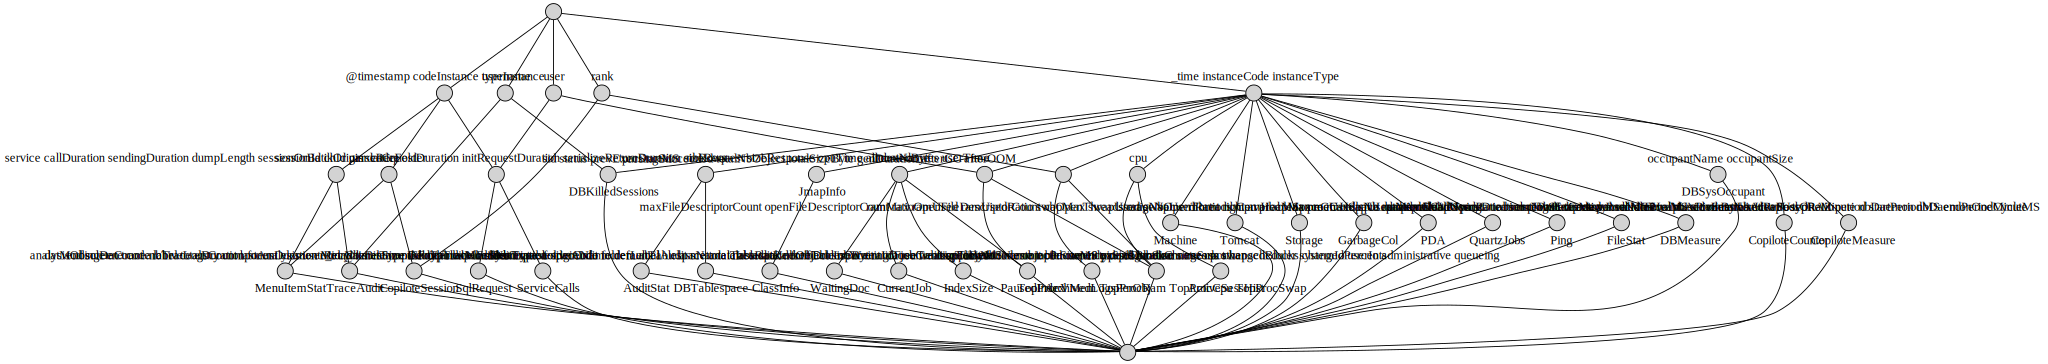

In [20]:
context.lattice.graphviz()

In [21]:
dict_propriete = {}
for propriete in context.properties:
    dict_propriete[propriete] = len(context.extension([propriete]))


proprietes_extent_count = {k: v for k, v in sorted(dict_propriete.items(), key=lambda x: x[1], reverse=True)}
relations_sum = sum([v for k, v in proprietes_extent_count.items()])
print(proprietes_extent_count)

{'_time': 27, 'instanceCode': 27, 'instanceType': 27, 'user': 7, 'rank': 6, 'cpu': 5, '@timestamp': 5, 'codeInstance': 5, 'typeInstance': 5, 'top10': 4, 'uid': 4, 'pid': 4, 'cmd': 4, 'ram': 4, 'vsz': 4, 'rss': 4, 'swap': 4, 'indexName': 4, 'nbRows': 2, 'username': 2, 'parsingSucceeded': 2, 'totalNbObject': 2, 'totalSizeByte': 2, 'genDuration': 2, 'afterGC': 2, 'afterOOM': 2, 'sessionId': 2, 'usr': 2, 'ikOrigin': 2, 'datCre': 2, 'codeFolder': 2, 'service': 2, 'callDuration': 2, 'sendingDuration': 2, 'dumpLength': 2, 'sessionOrBatchId': 2, 'parseRequestDuration': 2, 'initRequestDuration': 2, 'serializeReturnDuration': 2, 'sizeRequest': 2, 'sizeResponse': 2, 'cpuTime': 2, 'allocatedBytes': 2, 'userTime': 2, 'ramMax': 1, 'ramUsed': 1, 'ramUsedRatio': 1, 'swapMax': 1, 'swapUsed': 1, 'swapUsedRatio': 1, 'nbCpu': 1, 'procMax': 1, 'procUsed': 1, 'cpuLoad': 1, 'cpuLoadNorm': 1, 'maxFileDescriptorCount': 1, 'openFileDescriptorCount': 1, 'ratioOpenFileDescriptorCount': 1, 'nbOpenThreads': 1, 'rat

In [24]:
import pandas as pd
import plotly.express as px

# import matplotlib.pyplot as plt
# pour chaque rang dans les proprietes_extent_count triées, on calcul la couverture (proportion de relations couvertes)
cum_sum_relations = 0
nb_top_properties_vs_covered_relations = {"nb_top_properties": [], "covered_relations": []}

for i, (propriete, count) in enumerate(proprietes_extent_count.items()):
    cum_sum_relations += count
    nb_top_properties_vs_covered_relations["nb_top_properties"].append(i)
    nb_top_properties_vs_covered_relations["covered_relations"].append(cum_sum_relations / relations_sum * 100)

df = pd.DataFrame(data=nb_top_properties_vs_covered_relations)
# df.plot(x="nb_top_properties", y="covered_relations")
df.to_csv("covered_relations_prior.csv")
px.scatter(df, x="nb_top_properties", y="covered_relations")

    